In [2]:
import pandas as pd

apps_with_duplicates = pd.read_csv('C:/Users/tanya/Downloads/apps.csv.zip')
apps = apps_with_duplicates.drop_duplicates()
print('Total number of apps in the dataset = ', apps['App'].count())
n=5
apps.sample(n)

Total number of apps in the dataset =  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1308,1596,PASS by KT (formerly KT certified),LIFESTYLE,3.5,7869,21M,"1,000,000+",Free,0,Everyone,Lifestyle,"August 1, 2018",02.00.06,4.4 and up
4619,5590,Timely Alarm Clock,LIFESTYLE,4.3,258717,9.4M,"10,000,000+",Free,0,Everyone,Lifestyle,"September 25, 2017",1.3.1,4.0.3 and up
678,829,"HelloTalk — Chat, Speak & Learn Foreign Languages",EDUCATION,4.4,84309,41M,"5,000,000+",Free,0,Everyone,Education,"July 25, 2018",2.6.6,4.1 and up
8061,9181,Exchange Bank - EB Mobile,FINANCE,4.6,8,31M,"1,000+",Free,0,Everyone,Finance,"May 2, 2018",18.1.79,5.0 and up
4348,5303,AK-47 guns Sounds,FAMILY,NaN,2,5.1M,100+,Free,0,Everyone,Entertainment,"June 28, 2018",666,4.0 and up


In [3]:
chars_to_remove = ['+', ',', 'M', '$']
cols_to_clean = ['Installs', 'Size', 'Price']

for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    
    apps[col] = pd.to_numeric(apps[col])

Average app rating =  4.173243045387994


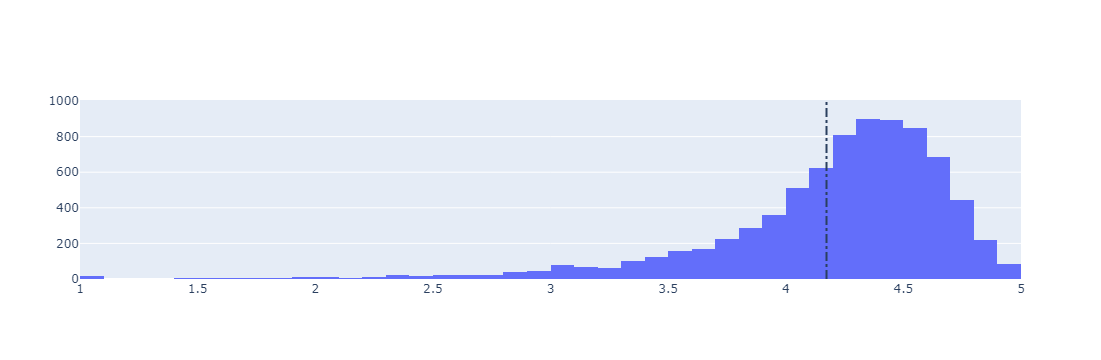

In [12]:
avg_app_rating = apps['Rating'].mean()
import plotly
import plotly.graph_objs as go

print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating'],
        xbins = {'start': 1, 'size': 0.1, 'end' : 5}
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
         }
plotly.offline.iplot({'data': data, 'layout': layout})

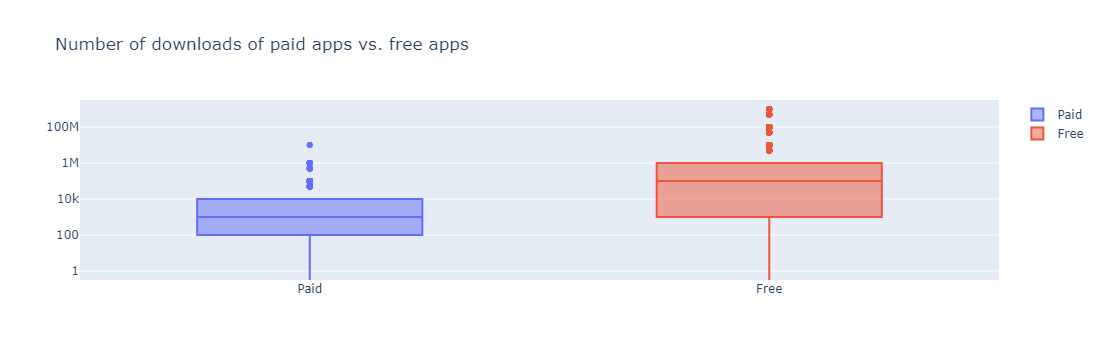

In [11]:
trace0 = go.Box(
    # Data for paid apps
    y=apps['Installs'][apps['Type'] == 'Paid'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps['Installs'][apps['Type'] == 'Free'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

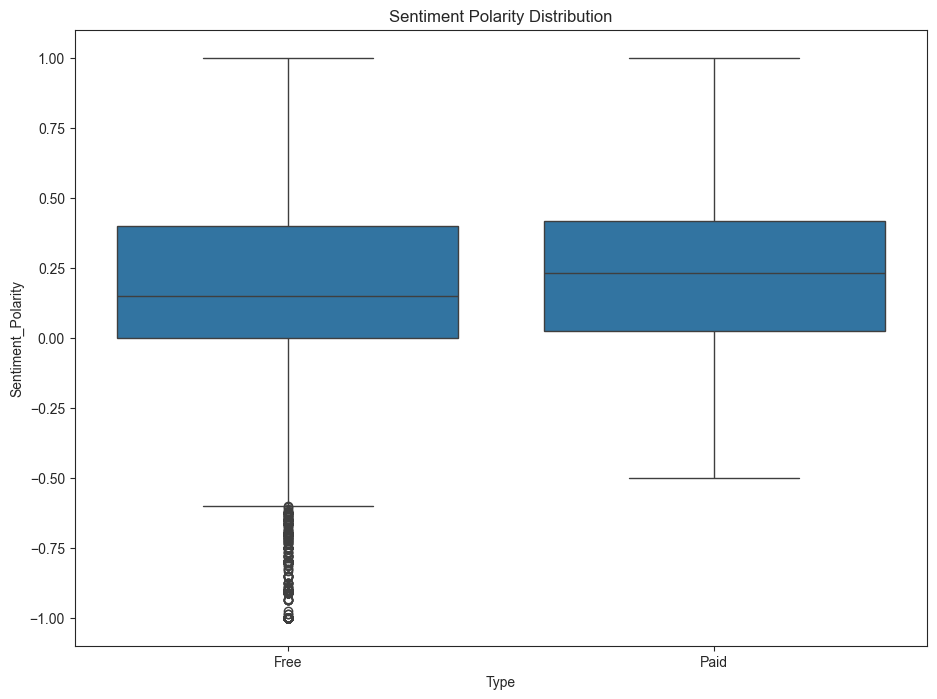

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

reviews_df = pd.read_csv('C:/Users/tanya/Downloads/user_reviews.csv.zip')

# Join and merge the two dataframe
merged_df = pd.merge(apps, reviews_df, on='App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')